In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
customers_df = pd.read_csv( "https://raw.githubusercontent.com/rssmahesh1/NewMLA/main/Income%20Data.csv")

In [4]:
customers_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

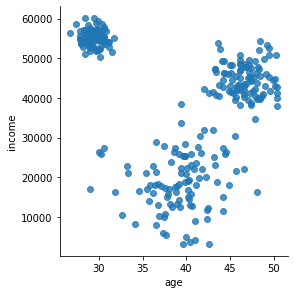

In [6]:
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );
#plt.title( "Fig 1: Customer Segments Based on Income and Age");

# **K-means Clustering**

In [7]:
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( customers_df )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
customers_df["clusterid"] = clusters.labels_

In [9]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,0
2,47800.0,46.75,2
3,19100.0,40.25,1
4,18200.0,35.80,1


# **Plotting the customers with their segments**

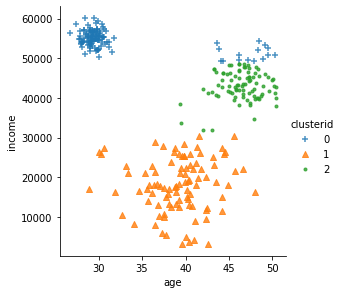

In [10]:
markers = ['+','^','.']
sn.lmplot( "age", "income",
data=customers_df,
hue = "clusterid",
fit_reg=False,
markers = markers,
size = 4 );

# **Normalizing the features**

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(
  customers_df[["age", "income"]] )
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [14]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

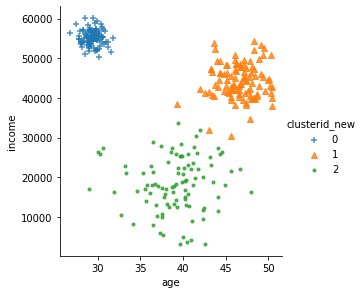

In [15]:
markers = ['+','^','.']
sn.lmplot( "age", "income",
data=customers_df,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );
#plt.title( "Fig 3: Customer segments created after normalization");

# **Cluster Centers and Interpreting the Clusters**

In [16]:
customers_df.groupby( 'clusterid' )['age',
'income'].agg( ["mean",
'std'] ).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  31.700435  6.122122  54675.652174  2362.224320
1         1  39.174479  3.626068  18144.791667  6745.241906
2         2  46.419101  2.289620  43053.932584  3613.769632

# **Creating Product Segments**
**Beer Dataset**

In [17]:
beer_df = pd.read_csv( 'https://raw.githubusercontent.com/rssmahesh1/NewMLA/main/beer.csv' )

In [18]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

# **How many clusters exist?**
**Using Dendrogram**

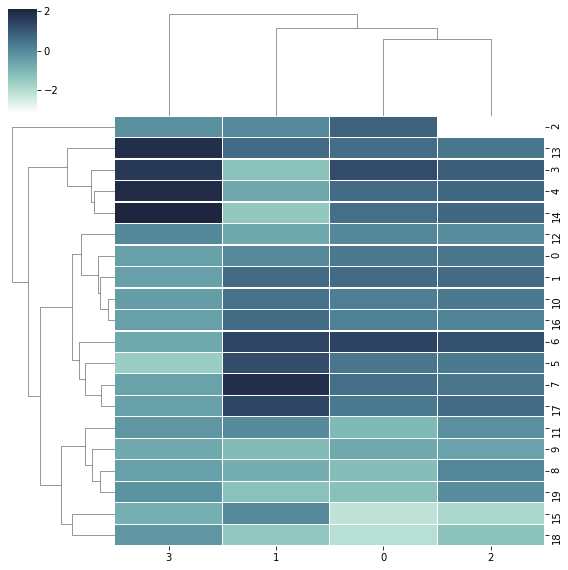

In [22]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,
              figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram of Beer Dataset");

In [28]:
beer_df.iloc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [29]:
beer_df.iloc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


**Finding Optimal Number of Clusters using Elbow Method**

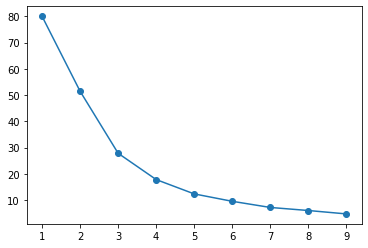

In [30]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

# **Normalizing Features**
**Rescaling the dataset**

In [31]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

**Creating Clusters**

In [32]:
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

**Interpreting the Clusters**

Cluster 0

In [33]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


**Cluster 1**

In [34]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


**Cluster 2**

In [35]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


# **Hierarchical clustering**

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_

In [38]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,0,0
8,Miller_Lite,99,10,4.3,0.43,0,0
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
12,Michelob_Light,135,11,4.2,0.50,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0


In [39]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,1,1
1,Schlitz,151,19,4.9,0.43,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
10,Coors,140,18,4.6,0.44,1,1
16,Hamms,139,19,4.4,0.43,1,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1


In [40]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2
